여러개의 데이터를 다차원배열 형태의 배치로 불러오는 Data Loader를 직접 만들어 봅시다.

먼저 필요한 모듈들을 import 합니다.

In [24]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

데이터를 로딩할 디렉터리 경로를 설정합니다. 앞 튜토리얼에서 활용했던, data_preprocessed 디렉터리를 사용하도록 합니다.

In [25]:
train_dir = 'data_preprocessed'

for 루프를 통해 리스트를 생성하는 것을 아래와 같이 한 라인으로 표현하는 문법을 List Comprehension이라고 합니다. 

다소 생소한 문법일지 모르지만 파이썬에서 매우 많이 쓰이는 구문입니다. 익숙해지면 매우 효율적으로 파이썬 코드를 작성할 수 있어 정말 편한 기능입니다. 실제로 for 루프를 돌리는 것 보다 로직이 효율적이라서 실행속도가 빠르다는 장점도 있습니다.

List Comprehension을 이용해 파일경로들의 리스트와, 파일경로의 인덱스의 리스트를 만듭니다.

In [26]:
train_path_list = [os.path.join(train_dir, x) for x in os.listdir(train_dir)]
idx_train = [i for i in range(len(train_path_list))]

인덱스를 섞어줍니다. 0부터 순서대로 증가하며 인덱싱할 때 사용할 커서 변수를 하나 선언합니다.

In [27]:
np.random.shuffle(idx_train)
cursor_train = 0

이미지는 3차원 배열입니다. 그렇다면 이미지들의 리스트는 당연히 4차원 배열입니다. 5장의 이미지를 하나의 배열에 넣는 함수를 만들어봅시다.

In [28]:
def next_train(cursor_train):
  # 먼저 이미지들이 들어갈 빈 배열을 만듭니다.
  # np.empty는 배열을 생성하면서 각각의 원소들에 대한 초기화 과정없이 내부에 무작위 쓰레기값을 채워넣습니다.
  # 당연히 np.ones나 np.zeros, np.array 같은 함수들 보다 가볍습니다.
  # 어차피 우리는 이 배열을 이미지로 꽉 채울 것이므로 np.empty를 사용하는 것이 합리적입니다.
  batch_img = np.empty((5, 227, 227, 3), dtype=np.float32)

  # enumerate는 반복가능한 객체로부터 객체의 값과 인덱스를 반환합니다.
  # 전혀 어려운 함수가 아닙니다. 아래 두 문장은 같은 로직입니다.
  #
  # idx = -1       //
  # for val in A:  //  for idx, val in enumerate(A):
  #   idx += 1     //
  #

  for idx, val in enumerate(idx_train[cursor_train:cursor_train + 5]): 
    # 파일경로의 인덱스의 리스트를 현재 커서의 위치로부터 5칸 뒤까지 자른 리스트로부터,
    # 파일경로의 인덱스를 하나씩 val에 반환받으며, idx는 0부터 1씩 증가시키겠다.
    # 5개의 인덱스를 모두 반환할 때까지 반복하겠다는 뜻입니다.
    pathname = train_path_list[val] 
    # val에 해당하는 인덱스에 있는 파일경로을 파일경로들의 리스트로부터 가져오겠다는 뜻입니다.
      
    batch_img[idx] = cv2.imread(pathname)
    # 파일경로로부터 cv2.imread 함수로 읽어온 이미지를 빈배열의 5개 배치채널 중, 한 배치채널에 복사합니다.
  
  return batch_img
  # 완성된 배치를 반환해줍니다.

위에서 정의한 함수를 이용해 이미지 5장을 배치로 만든 뒤 제대로 만들어 졌는지 확인해봅시다.

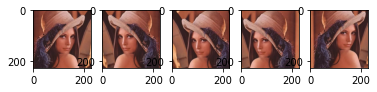

In [51]:
batch = next_train(cursor_train)

cursor_train += 5
# 5장 잘라썼으니 커서를 5칸 만큼 전진시켜줍니다.
if cursor_train + 5 > len(idx_train):
  cursor_train = 0
  np.random.shuffle(idx_train)
# 커서가 전체 이미지 파일의 수보다 커지면 0으로 되돌리고 데이터를 다시 섞어줍니다.

fig, ax = plt.subplots(1, 5)
for i in range(5):
  img_RGB = cv2.cvtColor(batch[i], cv2.COLOR_BGR2RGB).astype(np.uint8)#
  ax[i].imshow(img_RGB)

위 코드블럭을 반복실행하며 전체 데이터셋을 5장씩 배치화해서 불러오는 모습을 관찰해봅니다. 또한 한 번 순회가 끝나면 데이터셋을 섞어주는 모습을 관찰해봅니다.